<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В моем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', 50) # Показываем все столбцы
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

### Вывод

- данные состоят из 22 столбцов: total_images — число фотографий квартиры в объявлении; last_price — цена на момент снятия с публикации; total_area — площадь квартиры в квадратных метрах (м²); first_day_exposition — дата публикации; rooms — число комнат; ceiling_height — высота потолков (м); floors_total — всего этажей в доме; living_area — жилая площадь в квадратных метрах(м²); floor — этаж; is_apartment — апартаменты (булев тип); studio — квартира-студия (булев тип); open_plan — свободная планировка (булев тип); kitchen_area — площадь кухни в квадратных метрах (м²); balcony — число балконов; locality_name — название населённого пункта; airports_nearest — расстояние до ближайшего аэропорта в метрах (м); cityCenters_nearest — расстояние до центра города (м); parks_around3000 — число парков в радиусе 3 км; parks_nearest — расстояние до ближайшего парка (м); ponds_around3000 — число водоёмов в радиусе 3 км ponds_nearest — расстояние до ближайшего водоёма (м); days_exposition — сколько дней было размещено объявление (от публикации до снятия);
- всего строк 23699;
- при выгрузке csv файла в Data Frame данные склеились в одну строку. Было произведено разделение с помощью задания разделителя sep='\t'
- в данных есть пропущенные значения в столбцах:

ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, 
ponds_around3000, ponds_nearest, days_exposition
- присутствуют столбцы, в которых необходимо поменять тип данных: balcony — число балконов ->int; days_exposition — сколько дней было размещено объявление (от публикации до снятия) -> int; first_day_exposition — дата публикации -> date; floors_total — всего этажей в доме ->int; is_apartment — апартаменты (булев тип) -> bool; parks_around3000 — число парков в радиусе 3 км ->int; ponds_around3000 — число водоёмов в радиусе 3 км ->int.

## Предобработка данных

В столбце locality_name не хватает всего 49 значений, поэтому удаляем строки в которых в этом столбце стоит значение NaN

In [6]:
data.dropna(subset=['locality_name'], inplace=True)
data['locality_name'].isna().sum()

0

Проверяем столбец ceiling_height на отсутствие значений

In [7]:
data['ceiling_height'].isna().sum()

9160

Находим медиану по данному столбцу, т.к. она устойчива к выборосам, заполняем пропуски в значениях и проверяем результат

In [8]:
data['ceiling_height'] = data['ceiling_height'].astype('float64') # изменяем тип данных на вещественный
median_height = data['ceiling_height'].median()
data['ceiling_height'].fillna(median_height, inplace=True)
data['ceiling_height'].isna().sum()

0

Для столбцов living_area и last_price меняем тип данных на вещественный. Создадим новый столбец в котором посчитаем стоимость одного квадратного метра площади.

In [9]:
data['living_area'] = data['living_area'].astype('float64')
data['last_price'] = data['last_price'].astype('float64')
data['price_for_m2'] = data['last_price']/data['living_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,254901.960784
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,180107.526882
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,151486.880466
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,312500.000000


Сгруппируем данные по столбцу locality_name и найдем среднее по цене за 1 квадратынй метр.

In [10]:
grouped_price = data.groupby('locality_name')['price_for_m2'].transform('mean')
nan = data.groupby('locality_name')['price_for_m2'].mean()
nan.sort_values()

locality_name
деревня Малая Романовка    14808.362369
деревня Старополье         14851.485149
деревня Выскатка           18856.907895
поселок Тёсово-4           20833.333333
поселок Совхозный          22600.000000
                               ...     
поселок Севастьяново                NaN
поселок станции Лужайка             NaN
посёлок Левашово                    NaN
посёлок Петро-Славянка              NaN
посёлок Плоское                     NaN
Name: price_for_m2, Length: 364, dtype: float64

Посчитаем количество пропусков значений в столбце price_for_m2

In [11]:
grouped_price.isna().sum()

17

Заполняем пропуски медианным значением стоимости одного квадратного метра в зависимости от района и удаляем пропуски если они еще остались, т.к. восстановить данные если их нет, мы уже сможем

In [12]:
data['price_for_m2'].fillna(grouped_price, inplace=True)
data.dropna(subset=['price_for_m2'], inplace=True)
data['price_for_m2'].isna().sum()

0

Проверяем столбец living_area на пропущенные значения и заполняем пропуски площади поделив цену квадратного метра на стоимость одного квадратного метра

In [13]:
data['living_area'].isna().sum()


1881

In [14]:
data['living_area'].fillna(data['last_price']/data['price_for_m2'], inplace=True)
data['living_area'].isna().sum()

0

Проверяем столбец balcony на отсутствие значений и если значением отсутствует заполним столбце значением 0, т.к. в таком случае скорее всего имеется в виду, что балконов просто нет. Заменяем тип данных столбца на int64 и проверяем на пропущенные значения.

In [15]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int64')

In [16]:
data['balcony'].isna().sum()

0

Проверяем столбец is_apartment на отсутствие значений, переводим тип столбца в bool и заменяем пропущенные значения на 0, т.е. не аппартаменты.

In [17]:
data['is_apartment'].isna().sum()

20874

In [18]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'] = data['is_apartment'].fillna(0)
data['is_apartment'].isna().sum()

0

Переводим тип столбца airport_nearest в тип float64, находим количество пропущеных значений. Для заполнения пропусков находим среднее значение для данного столбца по району и заполняем пропущенные данные

In [19]:
data['airports_nearest'] = data['airports_nearest'].astype('float64')
grouped_airport_nearest = data.groupby('locality_name')['airports_nearest'].transform('mean')
data['airports_nearest'].isna().sum()

5519

In [20]:
data['airports_nearest'].fillna(grouped_airport_nearest, inplace=True)
data['airports_nearest'].isna().sum()

5371

В столбце cityCenter_nearest меняем тип данных, находим среднее значение по данному столбцу для каждого района и подставляем вместо пропусков найденные значения. 

In [21]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('float64')
data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('mean'), inplace=True)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].mean())
data['cityCenters_nearest'].isna().sum()

0

В столбце parks_around3000 меняем тип данных на float64, находит среднее по столбцу и заполняем пропуски средними значениями (средние значения могут иметь дробную часть) и обратно переводим в тип данных int64.

In [22]:
data['parks_around3000'] = data['parks_around3000'].astype('float64')
data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].mean())
data['parks_around3000'] = data['parks_around3000'].astype('int64')
data['parks_around3000'].isna().sum()

0

В столбце parks_nearest меняем тип данных на float64, находит среднее по столбцу и заполняем пропуски средними значениями.

In [23]:
data['parks_nearest'] = data['parks_nearest'].astype('float64')
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].mean())
data['parks_nearest'].isna().sum()

0

В столбце ponds_around3000 меняем тип данных на float64, находит среднее по столбцу и заполняем пропуски средними значениями, меняем тип данных обратно на  int64.

In [24]:
data['ponds_around3000'] = data['ponds_around3000'].astype('float64')
data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].mean())
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')
data['ponds_around3000'].isna().sum()

0

В столбце ponds_nearest меняем тип данных на float64, находит среднее по столбцу и заполняем пропуски средними значениями.

In [25]:
data['ponds_nearest'] = data['ponds_nearest'].astype('float64')
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].mean())
data['ponds_nearest'].isna().sum()

0

В столбце floors_total меняем тип данных на float64, находит среднее по столбцу, заполняем пропуски средними значениями и возвращаем тип данных int64.

In [26]:
data['floors_total'] = data['floors_total'].astype('float64')
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].mean())
data['floors_total'] = data['floors_total'].astype('int64')
data['floors_total'].isna().sum()

0

В столбце days_exposition меняем тип данных на float64, находит медиану по столбцу, заполняем пропуски медианными значениями и возвращаем тип данных int64.

In [27]:
data['days_exposition'] = data['days_exposition'].astype('float64')
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
data['days_exposition'] = data['days_exposition'].astype('int64')
data['days_exposition'].isna().sum()

0

В столбце kitchen_area меняем тип данных на float64, находит медиану по столбцу, заполняем пропуски медианными значениями.

In [28]:
data['kitchen_area'] = data['kitchen_area'].astype('float64')
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['kitchen_area'].isna().sum()

0

В столбце total_area меняем тип данных на float64.

In [29]:
data['total_area'] = data['total_area'].astype('float64')

Меняем тип данных в столбце last_price на int64, так как в этом столбце находятся большие числа и у всех в дробной части стоит 0.

In [30]:
data['last_price'] = data['last_price'].astype('int64')

Просматриваем, что в итоге получилось

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23633 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23633 non-null  int64  
 1   last_price            23633 non-null  int64  
 2   total_area            23633 non-null  float64
 3   first_day_exposition  23633 non-null  object 
 4   rooms                 23633 non-null  int64  
 5   ceiling_height        23633 non-null  float64
 6   floors_total          23633 non-null  int64  
 7   living_area           23633 non-null  float64
 8   floor                 23633 non-null  int64  
 9   is_apartment          23633 non-null  bool   
 10  studio                23633 non-null  bool   
 11  open_plan             23633 non-null  bool   
 12  kitchen_area          23633 non-null  float64
 13  balcony               23633 non-null  int64  
 14  locality_name         23633 non-null  object 
 15  airports_nearest   

### Вывод:

Все пропуски заполнены. В таблице осталось 23633 строки из 23699. Всего удалили 151 строку. Все типы данных исправлены.

## Расчёты и добавление результатов в таблицу

Разделим все квартиры на квартиры на первом этаже, квартиры на последнем этаже и квартиры на других этажах для этого напишем функцию и результаты ее работы занесем в созданный столбец таблицы

In [32]:
def floor_group(row):
    what_floor=row['floor']
    total_floor=row['floors_total']
    if what_floor==1:
        return 'Первый этаж'
    if what_floor==total_floor:
        return 'Последний этаж'
    return 'Другой этаж'

In [33]:
floor_position = data.apply(floor_group, axis=1)

In [34]:
data['floor_position'] = floor_position # Создаем новый столбец

В столбце first_day_exposition оставляем только дату (время нам не нужно, тем более что оно везде 00:00:00)

In [35]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1D') # округляем до даты
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,floor_position
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.000000,2,755.000000,95,254901.960784,Другой этаж
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,490.830729,0,518.043923,81,180107.526882,Первый этаж
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.000000,2,574.000000,558,151486.880466,Другой этаж
3,0,64900000,159.0,2015-07-24,3,2.65,14,301.795172,9,True,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2,84.000000,3,234.000000,424,215046.515335,Другой этаж
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.000000,121,312500.000000,Другой этаж


Создадим отдельные столбцы с днем недели, месяцем и годом

In [36]:
data['week_day'] = data['first_day_exposition'].dt.weekday # Столбец с днем недели
data['month'] = data['first_day_exposition'].dt.month # Столбец с месяцем
data['year'] = data['first_day_exposition'].dt.year # Столбец с годом
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,floor_position,week_day,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.000000,2,755.000000,95,254901.960784,Другой этаж,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,490.830729,0,518.043923,81,180107.526882,Первый этаж,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.000000,2,574.000000,558,151486.880466,Другой этаж,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,301.795172,9,True,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2,84.000000,3,234.000000,424,215046.515335,Другой этаж,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.000000,121,312500.000000,Другой этаж,1,6,2018


Посчитаем соотношение жилой площади к общей площади квартиры. Посчитаем отношение площади курхни к общей площади квартиры. Добавим оба это отношение в качестве новых столбцов в датасет.

In [37]:
data['living_area/total_area'] = data['living_area'] / data['total_area']

In [38]:
data['kitchen_area/total_area'] = data['kitchen_area'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,floor_position,week_day,month,year,living_area/total_area,kitchen_area/total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.000000,2,755.000000,95,254901.960784,Другой этаж,3,3,2019,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,490.830729,0,518.043923,81,180107.526882,Первый этаж,1,12,2018,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.000000,2,574.000000,558,151486.880466,Другой этаж,3,8,2015,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,301.795172,9,True,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2,84.000000,3,234.000000,424,215046.515335,Другой этаж,4,7,2015,1.898083,0.057233
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.000000,121,312500.000000,Другой этаж,1,6,2018,0.320000,0.410000


### Вывод:

Мы добавили в датасет все данные, которые нам необходимы для ответа на вопросы исследования.

## Исследовательский анализ данных

In [39]:
import matplotlib.pyplot as plt # Импорт библиотеки для построения графиков

<AxesSubplot:>

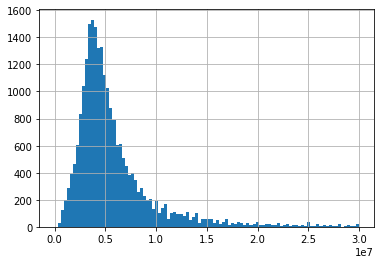

In [40]:
data['last_price'].hist(bins=100, range=(0, 30000000))

Из гистограммы видно, что наиболшее количество квартир продается за 3-4 млн. руб.

<AxesSubplot:>

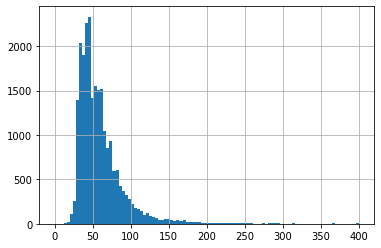

In [41]:
data['total_area'].hist(bins=100, range=(0, 400))

Из гистограммы видно, что больше всего продается квартир площадью 45-49 кв.м.

<AxesSubplot:>

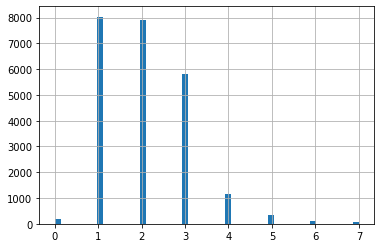

In [42]:
data['rooms'].hist(bins=50, range=(0, 7))

Из гистограммы видно, что больше всего продается однокомнатных и двухкомнатных квартир.

<AxesSubplot:>

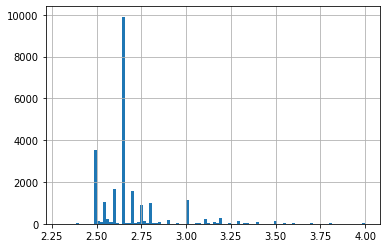

In [43]:
data['ceiling_height'].hist(bins=100, range=(2.3, 4))

Из гистограммы видно, что больше всего продается квартир с высотой потолков 2.6 м.

<AxesSubplot:>

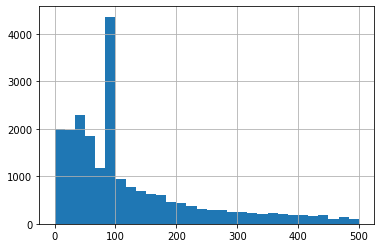

In [44]:
data['days_exposition'].hist(bins=30, range=(0, 500))

Из гистограммы видно, что больше всего продаж квартир состоялось на 95 деньс момента выставления объявления.

In [45]:
data['days_exposition'].describe() # исследуем датасет по столбцу  days_exposition

count    23633.000000
mean       169.237930
std        206.516127
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

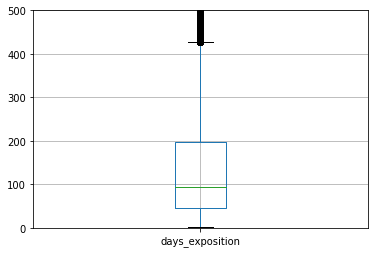

In [46]:
plt.ylim(0, 500)
data.boxplot(column='days_exposition')
plt.show()

Исследуя гистограмму продаж и диаграмму размаха можно видеть, что среднее время продажи квартиры 95 дней. Большая часть значений лежит за диапазоном 420 дней (1.5 межквартильного размаха, добавленного к третьему квартилю). Это выглядит правдоподобно. Самыми быстрыми продажами, можно зазвать продажи в один день. Самой долгой продажей )(если не брать во внимание выбросы, которые лежат за 1.5 межквартильного размаха) - 427 дней.

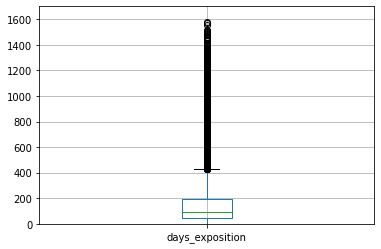

In [47]:
plt.ylim(0, 1700)
data.boxplot(column='days_exposition')
plt.show()

Данная диаграмма демонстрирует диаграмму размаха со всеми выбросами. 

In [48]:
data.sort_values(by='days_exposition', ascending=False).head() 
# Отсортировали таблицу по столбцу days_exposition в порядке убывания

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,floor_position,week_day,month,year,living_area/total_area,kitchen_area/total_area
18843,11,3500000,48.20,2014-12-15,2,2.50,5,27.40,2,True,False,False,7.70,3,деревня Новое Девяткино,NaN,14234.907335,0,490.830729,0,518.043923,1580,127737.226277,Другой этаж,0,12,2014,0.568465,0.159751
1109,1,34878556,95.80,2014-12-09,2,2.65,6,58.30,5,True,False,False,20.00,1,Санкт-Петербург,21860.0,318.000000,2,160.000000,3,569.000000,1572,598259.965695,Другой этаж,1,12,2014,0.608559,0.208768
9553,11,10600000,80.00,2014-12-09,3,2.85,17,44.00,9,True,False,False,15.00,0,Санкт-Петербург,17101.0,17110.000000,0,490.830729,0,518.043923,1553,240909.090909,Другой этаж,1,12,2014,0.550000,0.187500
1885,2,13300000,79.60,2014-12-09,2,3.00,8,42.70,7,True,False,False,18.00,0,Санкт-Петербург,39393.0,11096.000000,1,537.000000,0,518.043923,1513,311475.409836,Другой этаж,1,12,2014,0.536432,0.226131
6691,3,4400000,42.98,2014-12-12,1,2.65,5,18.72,1,True,False,False,11.31,0,Пушкин,19715.0,30358.000000,1,439.000000,3,232.000000,1512,235042.735043,Первый этаж,4,12,2014,0.435551,0.263146


<AxesSubplot:>

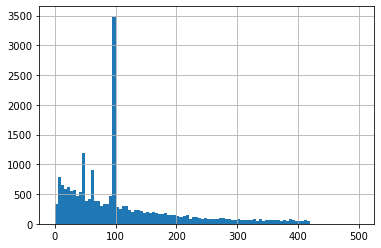

In [49]:
# Уберем выбросы находящиеся за 1.5 межквартильного интервала
current_days_exposition_data = data.query('days_exposition<420')
current_days_exposition_data['days_exposition'].hist(bins=100, range=(0, 500))

Убрала выбросы находящиеся за 1.5 межквартальным интервалом, добавленного к Q3. Всего наблюдается 4 пика. Самый большой пик- 95 дней, есть еще пики 50 дней, 70 дней и 10 дней. Не могу сказать, что это артифакты, т.к. реально это возможно. Большая часть выбросов лежит за диапазоном 420 дней и они стремяться к 0. Принаю решение от них избавиться.

In [50]:
current_days_exposition_data['last_price'].describe()

count    2.121500e+04
mean     6.377967e+06
std      1.078410e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      7.630000e+08
Name: last_price, dtype: float64

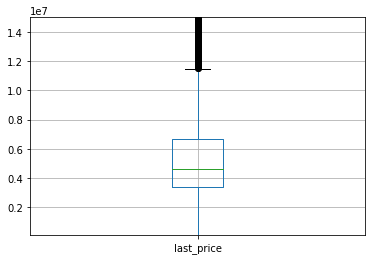

In [51]:
plt.ylim(100000, 15000000)
current_days_exposition_data.boxplot(column='last_price')
plt.show()

На диаграмме размаха видно, что в выбросы попадают квартиры стоимостью больше 11 млн. руб. 

In [52]:
current_days_exposition_data.sort_values(by='last_price', ascending=True).head(100)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,floor_position,week_day,month,year,living_area/total_area,kitchen_area/total_area
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.000000,25,True,False,False,40.5,0,Санкт-Петербург,36421.0,9176.000000,1,805.000000,0,518.043923,8,380.937500,Последний этаж,2,3,2019,0.293578,0.371560
17456,7,430000,30.4,2019-04-22,1,2.65,2,16.000000,1,True,False,False,6.0,0,Сланцы,NaN,14234.907335,0,490.830729,0,518.043923,95,26875.000000,Первый этаж,0,4,2019,0.526316,0.197368
14911,5,430000,54.0,2018-06-26,2,2.65,3,17.916667,3,True,False,False,9.1,0,посёлок станции Свирь,NaN,14234.907335,0,490.830729,0,518.043923,44,24000.000000,Последний этаж,1,6,2018,0.331790,0.168519
16274,18,440000,40.0,2018-07-10,1,2.65,5,29.626667,1,True,False,False,9.1,0,деревня Старополье,NaN,14234.907335,0,490.830729,0,518.043923,45,14851.485149,Первый этаж,1,7,2018,0.740667,0.227500
5698,7,450000,42.0,2017-07-31,2,2.65,1,23.000000,1,True,False,False,5.8,0,городской посёлок Будогощь,NaN,14234.907335,0,490.830729,0,518.043923,233,19565.217391,Первый этаж,0,7,2017,0.547619,0.138095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13646,8,770000,45.0,2018-03-28,2,2.50,5,29.000000,2,True,False,False,7.0,0,Сланцы,NaN,14234.907335,0,490.830729,0,518.043923,211,26551.724138,Другой этаж,2,3,2018,0.644444,0.155556
18985,20,770000,32.0,2018-07-05,1,2.65,2,18.000000,2,True,False,False,8.0,0,Сланцы,NaN,14234.907335,0,490.830729,0,518.043923,54,42777.777778,Последний этаж,3,7,2018,0.562500,0.250000
2209,12,770000,33.0,2016-06-29,1,2.50,5,17.000000,5,False,False,False,6.5,1,Сланцы,NaN,14234.907335,0,490.830729,0,518.043923,45,45294.117647,Последний этаж,2,6,2016,0.515152,0.196970
7442,7,777000,44.0,2019-01-01,2,2.50,2,30.000000,2,True,False,False,8.0,1,деревня Ялгино,NaN,14234.907335,0,490.830729,0,518.043923,45,25900.000000,Последний этаж,1,1,2019,0.681818,0.181818


Смотрю самую дорогую квартиру. Данные правдивые. Такие квартиры существуют. Так как их единицы, то думаю, что можно убрать значения начиная с 1.5 межквартального интервала + Q3 = 11 * 10^6, правее все стремится к нулю. Также кажутся неправильными значения меньшие 1500000 за квартиру. Тоже уберу.

In [53]:
current_days_exposition_data = current_days_exposition_data.query('1500000<last_price<11*10**6')

<AxesSubplot:xlabel='last_price'>

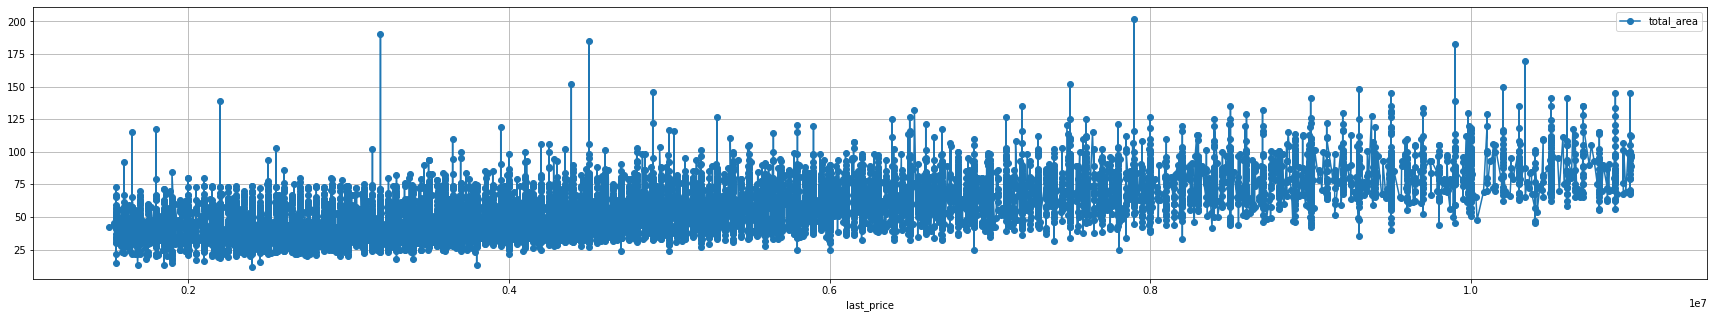

In [54]:
(current_days_exposition_data
    .sort_values(by='last_price',ascending=True)
    .plot(x='last_price',y='total_area',grid=True, style='o-',figsize=(30,5))
)

In [55]:
current_days_exposition_data['last_price'].corr(current_days_exposition_data['total_area'])

0.686790421756692

При увеличении прощади, увеличиватеся стоимость квартиры. Стоимость квартиры коррелирует с площадью на коэффициент Пирсона 0.68. Значит эти величины сильно зависят друг от друга. Положительная корреляция.

<AxesSubplot:xlabel='rooms'>

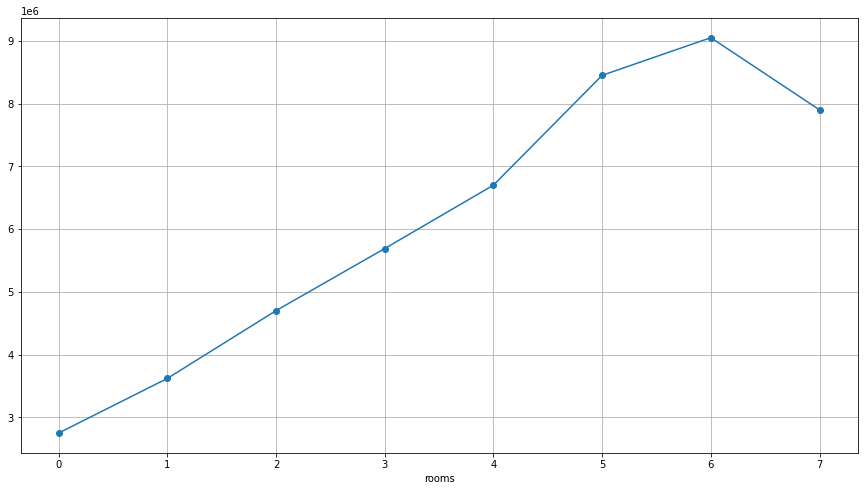

In [56]:
(current_days_exposition_data
     .groupby('rooms')['last_price'].median()
    # .sort_values(by='rooms',ascending=True)
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),alpha=1)
)

Из этого графика следует, что при увеличении количества комнат, увеличивается стоимость. Начиная с 7 комнат, цена становится рниже, так как мало данных и значения медианной цены могут вносить свою корректировку.

In [57]:
current_days_exposition_data['last_price'].corr(current_days_exposition_data["rooms"])

0.4498929902274054

Коэффициент Пирсона равен 0.45, следовательно имеется пложительная корреляция цены и количества комнат.

<AxesSubplot:xlabel='floor_position'>

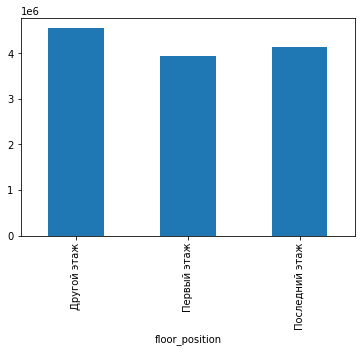

In [58]:
(current_days_exposition_data
    .groupby('floor_position')['last_price'].median()
    .plot(x='floor_position',y='last_price',kind='bar')
)

Из гистограммы видно, что цена не сильно зависит от этажа, хотя цена за первый этаж немного ниже.

<AxesSubplot:xlabel='cityCenters_nearest'>

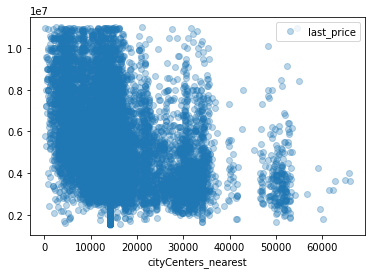

In [59]:
(current_days_exposition_data
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o',alpha=0.3)
)

In [60]:
current_days_exposition_data['cityCenters_nearest'].corr(current_days_exposition_data['last_price'])

-0.2578511233575464

Очень большой разброс, но можно увидеть плотности, которые показывают, что при увеличении расстояния, стоимость уменьшается не сильно. Об этом говорит и отрицательный коэффициент Пирсона = -0.26.

<AxesSubplot:xlabel='week_day'>

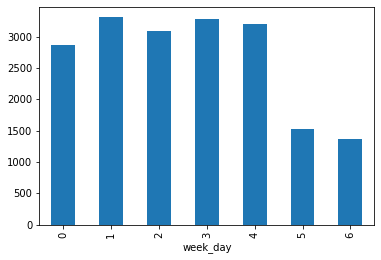

In [61]:
(current_days_exposition_data
     .groupby('week_day')['last_price'].count()
     .plot(x='week_day',y='last_price',kind='bar')
)

Из гистограммы видно, чо чаще всего продажы наступают во вторник, четверг и пятницу. В выходные меньше всего, т.к. это выходные.

<AxesSubplot:xlabel='month'>

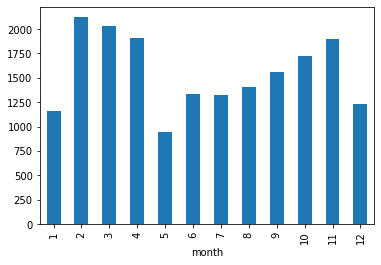

In [62]:
(current_days_exposition_data
     .groupby('month')['last_price'].count()
     .plot(x='month',y='last_price',kind='bar')
)

Из гистограммы видно, продажи меньше всего происходят перед и после новогодних праздников: в декабре и январе. В этом время много выходных и люди тратят деньги на подраки и отдых. В мае низние продажи, тоже видимо из-за майских праздников.

<AxesSubplot:xlabel='year'>

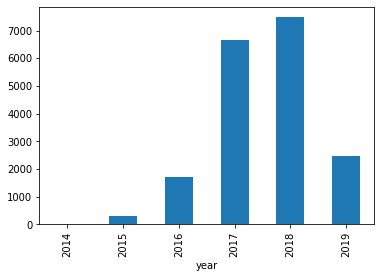

In [63]:
(current_days_exposition_data
     .groupby('year')['last_price'].count()
     .plot(x='year',y='last_price',kind='bar')
)

Больше всего продаж квартир было в 2017 и 2018 годах, видимо в это время у людей были деньги покупать недвижимость.

In [64]:
raiting_of_location=current_days_exposition_data.pivot_table(index='locality_name',values='price_for_m2',aggfunc=('count','median'))
raiting_of_location.sort_values(by='count',ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,12174,187910.624401
посёлок Мурино,479,177389.637355
посёлок Шушары,404,150424.203462
Всеволожск,347,128571.428571
Колпино,314,126794.871795
Пушкин,305,183510.638298
посёлок Парголово,299,200718.185634
Гатчина,266,119500.000000
деревня Кудрово,262,188187.004886


Топ 10 районов с самым большим количеством объявлений и средней стоимостью 1 кв.м. В Санкт-Петербурге больше всего объявлений и самая большая стоимость 1 кв.м. В Выборге меньше всего объявлений и самая низкая стоимость 1 кв.м.

Добавляем в основную таблицу столбцец с расстоянием до центра в км. Считаем стоимость 1 кв.м. для всех объектов и записываем в таблицу

In [65]:
current_days_exposition_data['cityCenters_nearest_in_km']=current_days_exposition_data['cityCenters_nearest']/1000

In [66]:
current_days_exposition_data['cost_of_km']=current_days_exposition_data['last_price']/current_days_exposition_data['cityCenters_nearest_in_km']

Делаем срез по району г.Санкт-Петербург

In [67]:
spb_region=current_days_exposition_data.query('locality_name=="Санкт-Петербург"')
spb_region.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,floor_position,week_day,month,year,living_area/total_area,kitchen_area/total_area,cityCenters_nearest_in_km,cost_of_km
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00000,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.000000,121,312500.000000,Другой этаж,1,6,2018,0.320000,0.410000,8.098,1.234873e+06
7,5,7915000,71.6,2019-04-18,2,2.65,24,36.80599,22,True,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0,490.830729,0,518.043923,95,215046.515335,Другой этаж,3,4,2019,0.514050,0.263966,11.634,6.803335e+05
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.60000,7,True,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0,490.830729,0,518.043923,289,123853.211009,Другой этаж,6,2,2017,0.714754,0.106557,15.008,3.598081e+05
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.30000,3,True,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1,310.000000,2,553.000000,137,248768.472906,Другой этаж,3,11,2017,0.512626,0.214646,13.878,3.638853e+05
15,16,4650000,39.0,2017-11-18,1,2.65,14,20.50000,5,True,False,False,7.6,1,Санкт-Петербург,12900.0,14259.0,1,590.000000,1,296.000000,19,226829.268293,Другой этаж,5,11,2017,0.525641,0.194872,14.259,3.261098e+05


<AxesSubplot:xlabel='cityCenters_nearest_in_km'>

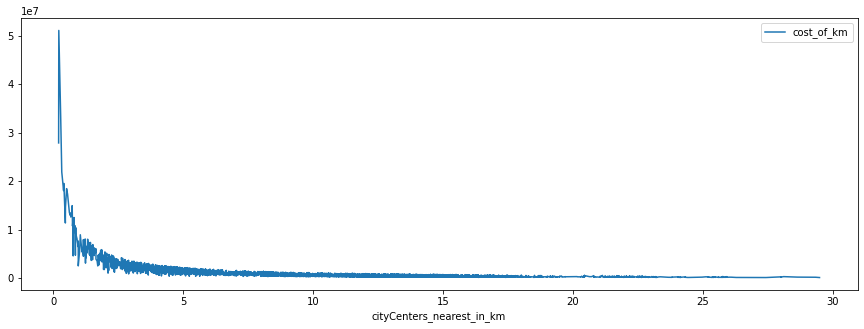

In [68]:
(spb_region
     .sort_values(by='cityCenters_nearest_in_km',ascending=True)
     .plot(x='cityCenters_nearest_in_km',y='cost_of_km', style='-',figsize=(15,5))
)

Из графика видно, что в отдалении от центра Санкт-Петербурга на расстояние 5 км цена почти перестает меняться и идет плотной линией.

Рассмотрим подробнее квартиры, которые находятся от центра на расстоянии не более 5 км.

In [69]:
spb_region=spb_region.query('cityCenters_nearest_in_km<5')

In [70]:
len(spb_region)

1005

Квартиры в центре

In [71]:
spb_region.sort_values(by='cost_of_km',ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,floor_position,week_day,month,year,living_area/total_area,kitchen_area/total_area,cityCenters_nearest_in_km,cost_of_km
8614,7,10990000,100.0,2015-12-16,3,3.90,5,37.800000,3,True,False,False,11.6,0,Санкт-Петербург,21818.0,215.0,3,229.0,2,511.0,265,290740.740741,Другой этаж,2,12,2015,0.378000,0.116000,0.215,5.111628e+07
1934,18,9590000,108.0,2017-05-23,2,3.30,5,59.000000,2,False,False,False,11.0,0,Санкт-Петербург,21908.0,287.0,3,359.0,3,290.0,69,162542.372881,Другой этаж,1,5,2017,0.546296,0.101852,0.287,3.341463e+07
1182,1,5800000,33.6,2016-03-10,1,3.70,7,22.800000,4,False,False,False,6.6,0,Санкт-Петербург,21632.0,208.0,3,304.0,3,503.0,167,254385.964912,Другой этаж,3,3,2016,0.678571,0.196429,0.208,2.788462e+07
22036,3,7200000,72.0,2017-12-21,2,3.07,3,44.900000,2,True,False,False,12.3,0,Санкт-Петербург,21875.0,329.0,3,426.0,3,273.0,89,160356.347439,Другой этаж,3,12,2017,0.623611,0.170833,0.329,2.188450e+07
9488,3,8000000,106.0,2018-07-26,3,3.40,4,37.201254,1,True,False,False,9.1,0,Санкт-Петербург,21653.0,410.0,3,591.0,2,38.0,60,215046.515335,Первый этаж,3,7,2018,0.350955,0.085849,0.410,1.951220e+07


Выбираем кваритры с самой высокой стоимостью за 1 кв.м. в центре Санкт-Петербурга

In [72]:
top=current_days_exposition_data.query('cityCenters_nearest_in_km<5 and locality_name=="Санкт-Петербург"')
top.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,floor_position,week_day,month,year,living_area/total_area,kitchen_area/total_area,cityCenters_nearest_in_km,cost_of_km
24,8,6500000,97.2,2015-10-31,2,2.65,3,46.5,1,True,False,False,19.6,0,Санкт-Петербург,20052.0,2336.0,3,411.000000,3,124.000000,265,139784.946237,Первый этаж,5,10,2015,0.478395,0.201646,2.336,2.782534e+06
99,32,9600000,90.0,2017-09-26,4,2.65,5,67.0,2,True,False,False,8.0,0,Санкт-Петербург,23277.0,2818.0,0,490.830729,0,518.043923,104,143283.582090,Другой этаж,1,9,2017,0.744444,0.088889,2.818,3.406671e+06
136,16,6500000,51.8,2018-08-01,2,3.45,6,25.6,2,True,False,False,7.3,1,Санкт-Петербург,20502.0,3618.0,2,533.000000,1,812.000000,163,253906.250000,Другой этаж,2,8,2018,0.494208,0.140927,3.618,1.796573e+06
138,8,4800000,40.0,2017-11-18,2,2.65,3,29.0,2,True,False,False,6.0,0,Санкт-Петербург,23371.0,2913.0,0,490.830729,2,729.000000,80,165517.241379,Другой этаж,5,11,2017,0.725000,0.150000,2.913,1.647786e+06
154,1,8200000,80.0,2018-11-06,3,4.15,3,44.2,2,True,False,False,12.2,0,Санкт-Петербург,20562.0,3167.0,2,344.000000,1,838.000000,38,185520.361991,Другой этаж,1,11,2018,0.552500,0.152500,3.167,2.589201e+06


Изучим такие квартиры.

<AxesSubplot:>

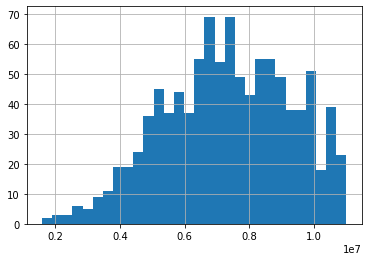

In [73]:
top['last_price'].hist(bins=30)

В центре Санкт-Петербурга больше всего квартир за 7 млн. руб.

<AxesSubplot:>

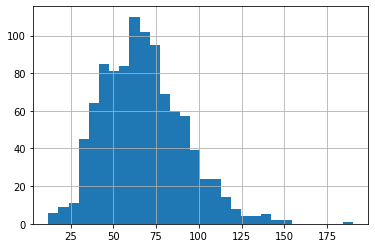

In [74]:
top['total_area'].hist(bins=30)

В центре Санкт-Петербугра большей всего квартир общей площадью около 60 кв.м.

<AxesSubplot:>

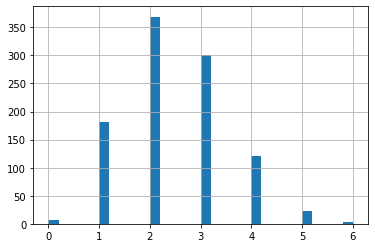

In [75]:
top['rooms'].hist(bins=30)

В центре Санкт-Петербурга больше всего продается 2 комнатных квартир.

<AxesSubplot:>

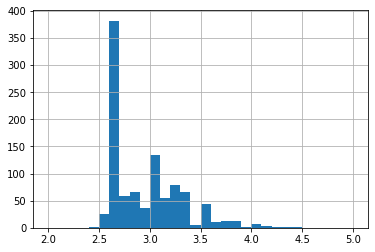

In [76]:
top['ceiling_height'].hist(bins=30,range=(2,5))

В центре Санкт-Петербурга больше всего продается квартир с высотой потолка 2,6 м.

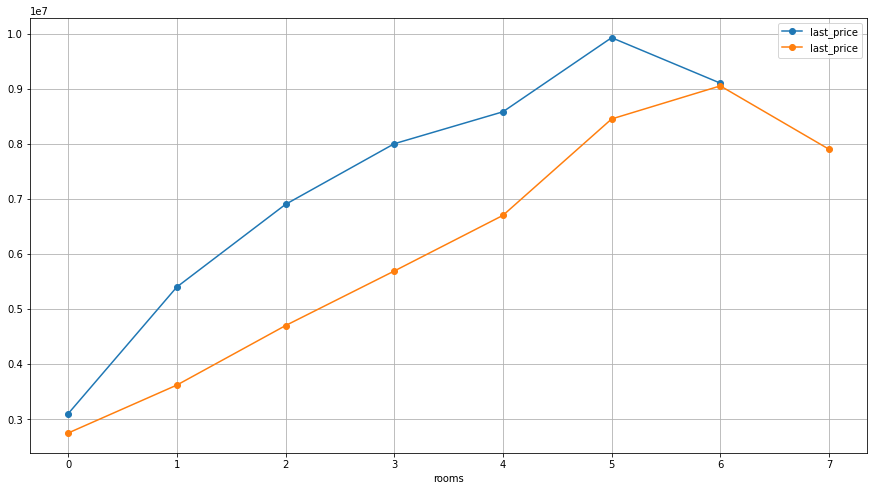

In [77]:
(top
     .sort_values(by='last_price',ascending=True)
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),legend=True)
)


(current_days_exposition_data
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),legend=True)
)
plt.show()

На графике видно, что с увеличением комнат увеличивается стоимость. График квартир в центре сдвинут вверх отностительно графика всех квартир имеющихся в базе, т.к. в центре квартиры дороже. Самые дорогие 5 комнатные квартиры.

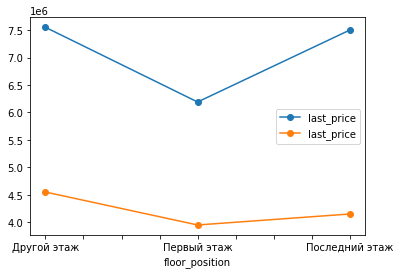

In [78]:
(top
    .groupby('floor_position')['last_price'].median()
    .plot(x='floor_position',y='last_price',style='o-',legend=True)
)


(current_days_exposition_data
    .groupby('floor_position')['last_price'].median()
    .plot(x='floor_position',y='last_price',style='o-',legend=True)
)

plt.show()

Из графика следует, что квартиры на последнем этаже покупают охотнее, чем квартиры на первом этаже. На первом этаже кваритры покупают реже всего. В центре Санкт-Петербурга квартиры дороже, чем в других районах.

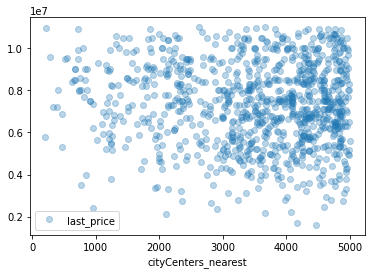

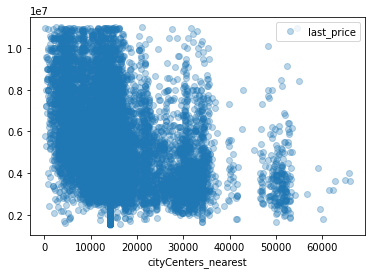

In [79]:
(top
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o',alpha=0.3)
)

(current_days_exposition_data
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o',alpha=0.3)
)

plt.show()

Из анализа диаграмм следует, что больше всего продается квартир на расстоянии 4-5 км от центра и стоят они от 6 до 8 млн. руб.

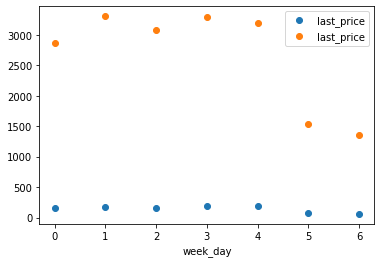

In [80]:
(top
     .groupby('week_day')['last_price'].count()
     .plot(x='week_day',y='last_price',style='o',legend=True)
)

(current_days_exposition_data
     .groupby('week_day')['last_price'].count()
     .plot(x='week_day',y='last_price',style='o',legend=True)
)

plt.show()

В рабочие дни квартиры продаются примерно одинаково, в выходные продается сильно меньше квартир.

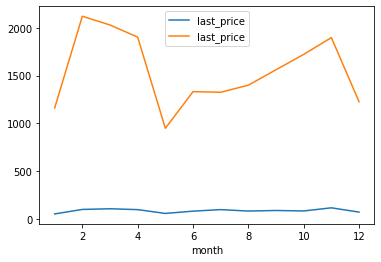

In [81]:
(top
     .groupby('month')['last_price'].count()
     .plot(x='month',y='last_price',style='-',legend=True)
)
(current_days_exposition_data
     .groupby('month')['last_price'].count()
     .plot(x='month',y='last_price',style='-',legend=True)
)

plt.show()

В течение года квартиры продаются примерно одинаково.

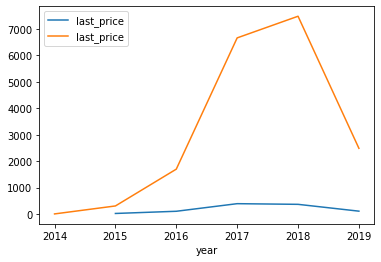

In [82]:
(top
     .groupby('year')['last_price'].count()
     .plot(x='year',y='last_price',style='-',legend=True)
)
(current_days_exposition_data
     .groupby('year')['last_price'].count()
     .plot(x='year',y='last_price',style='-',legend=True)
)

plt.show()

На основании графика можно сазать, что квартиры в центре Санкт-Петербурга продаются примерно в одинаковом количестве каждый год, таких сильных колебания как на общем графике по всем районам не наблюдается.

## Общий вывод

Если обобщить все данные, то можно сделать вывод, что больше всего квартир продается в будние дни, причем это 1-3 комнатные квартиры, на любом этаже кроме первого, с высотой потолка 2,6 м за 4-5 млн. рублей. Цена квадратного метра недвижимости зависит от этажа, района, высоты потолка и от количества комнат. Корреляция эти параметров в центре похожа и на все квартиры в целом по региону. 